# 06: Model Selection and Hyperparameter Tuning

## Overview
This notebook covers model selection and hyperparameter tuning techniques essential for machine learning and deep learning.

## Topics Covered:
1. Grid Search
2. Random Search
3. Cross-Validation
4. Learning Curves
5. Validation Curves
6. Model Selection Strategies

## Focus Points:
- Understanding core concepts
- Practical implementation
- When to apply each technique
- Common pitfalls and solutions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully')

Libraries imported successfully


## Key Concepts

This notebook covers:

- GridSearchCV
- RandomizedSearchCV
- K-Fold CV
- Stratified K-Fold
- Hyperparameter optimization

## Implementation Examples

The following sections provide practical implementations of the concepts above.

In [2]:
# Example 1: Basic setup and data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training samples: {len(X_train)}')
print(f'Test samples: {len(X_test)}')
print(f'Number of features: {X.shape[1]}')

Training samples: 800
Test samples: 200
Number of features: 20


## 1. Cross-Validation Strategies

In [3]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# K-Fold CV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
scores_kfold = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print('K-Fold Cross-Validation:')
print(f'Scores: {scores_kfold}')
print(f'Mean: {scores_kfold.mean():.4f} (+/- {scores_kfold.std():.4f})')

# Stratified K-Fold (maintains class distribution)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_skfold = cross_val_score(model, X, y, cv=skfold, scoring='accuracy')

print('\nStratified K-Fold Cross-Validation:')
print(f'Scores: {scores_skfold}')
print(f'Mean: {scores_skfold.mean():.4f} (+/- {scores_skfold.std():.4f})')

# Multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
scores_multi = cross_validate(model, X, y, cv=skfold, scoring=scoring)

print('\nMultiple Metrics:')
for metric in scoring:
    print(f'{metric}: {scores_multi[f"test_{metric}"].mean():.4f}')

K-Fold Cross-Validation:
Scores: [0.895 0.925 0.85  0.89  0.92 ]
Mean: 0.8960 (+/- 0.0267)

Stratified K-Fold Cross-Validation:
Scores: [0.935 0.855 0.905 0.9   0.91 ]
Mean: 0.9010 (+/- 0.0260)

Multiple Metrics:
accuracy: 0.9010
precision: 0.9105
recall: 0.8898
f1: 0.8999


## 2. Grid Search

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

# Grid search
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print('Running Grid Search...')
grid_search.fit(X_train, y_train)

print('\nBest parameters:', grid_search.best_params_)
print(f'Best CV score: {grid_search.best_score_:.4f}')
print(f'Test score: {grid_search.score(X_test, y_test):.4f}')

# Results DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
print('\nTop 5 configurations:')
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
      .sort_values('rank_test_score').head())

Running Grid Search...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV score: 0.9538
Test score: 0.9450

Top 5 configurations:
                                           params  mean_test_score  \
31     {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}          0.95375   
23      {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}          0.95125   
17   {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}          0.95000   
15       {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}          0.94750   
25  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}          0.94750   

    std_test_score  rank_test_score  
31        0.015104                1  
23        0.014470                2  
17        0.014790                3  
15        0.017500                4  
25        0.017500                4  


## 3. Randomized Search

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Randomized search
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print('Running Randomized Search...')
random_search.fit(X_train, y_train)

print('\nBest parameters:', random_search.best_params_)
print(f'Best CV score: {random_search.best_score_:.4f}')
print(f'Test score: {random_search.score(X_test, y_test):.4f}')

Running Randomized Search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 58}
Best CV score: 0.8900
Test score: 0.8850


## 4. Learning Curves

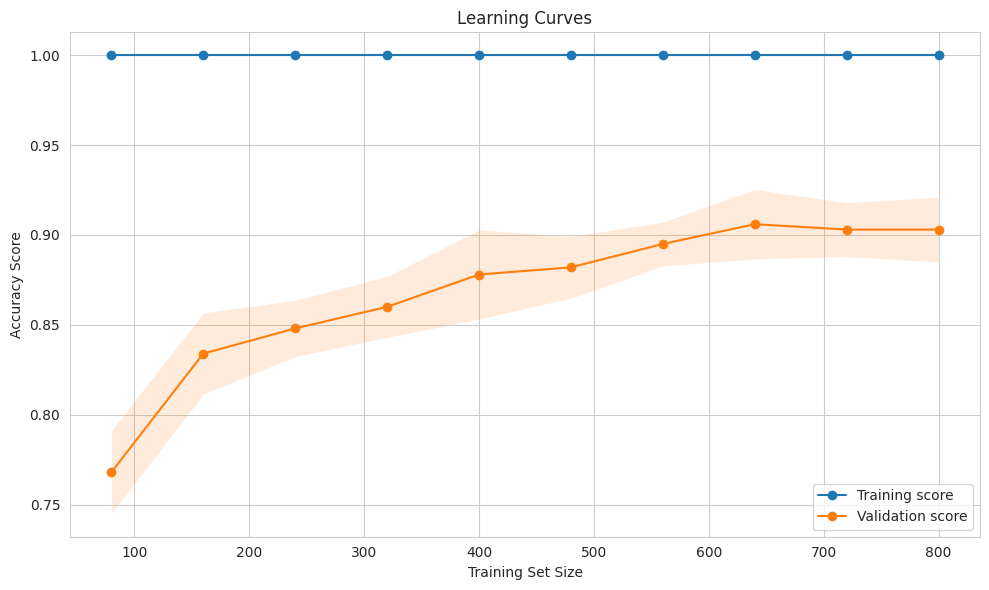

Learning curves help diagnose:
- High bias (underfitting): Both curves converge at low score
- High variance (overfitting): Large gap between training and validation


In [6]:
from sklearn.model_selection import learning_curve

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, val_mean, label='Validation score', marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

print('Learning curves help diagnose:')
print('- High bias (underfitting): Both curves converge at low score')
print('- High variance (overfitting): Large gap between training and validation')

## 5. Validation Curves

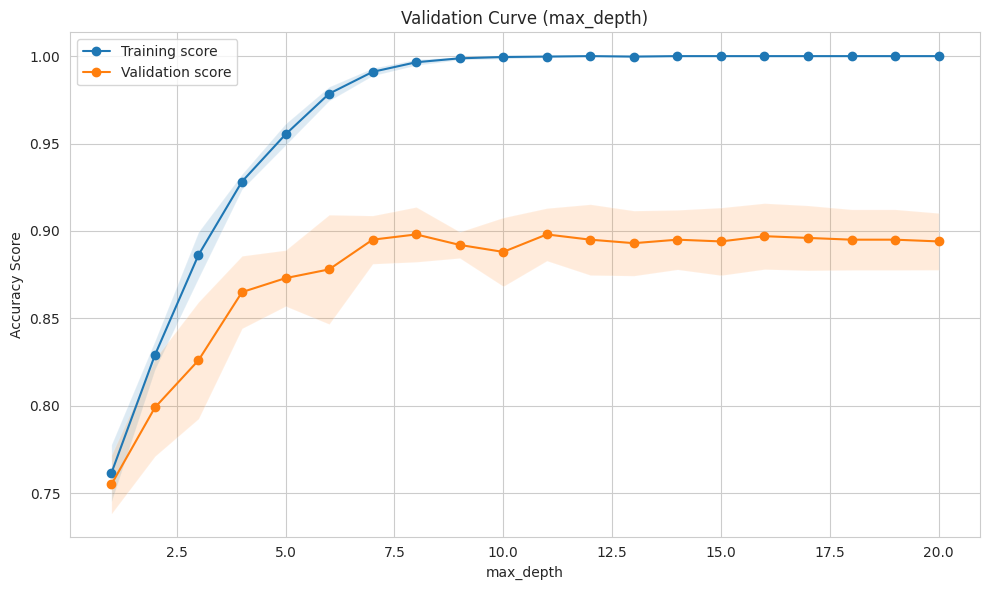

Validation curves help find optimal hyperparameter values
Look for where validation score is maximized without overfitting


In [7]:
from sklearn.model_selection import validation_curve

# Validation curve for max_depth parameter
param_range = np.arange(1, 21)
train_scores, val_scores = validation_curve(
    RandomForestClassifier(n_estimators=50, random_state=42),
    X, y,
    param_name='max_depth',
    param_range=param_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot validation curves
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(param_range, val_mean, label='Validation score', marker='o')
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.15)
plt.xlabel('max_depth')
plt.ylabel('Accuracy Score')
plt.title('Validation Curve (max_depth)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

print('Validation curves help find optimal hyperparameter values')
print('Look for where validation score is maximized without overfitting')

## Best Practices

1. Always split data before preprocessing
2. Use cross-validation for model evaluation
3. Monitor for overfitting/underfitting
4. Document hyperparameters and experiments
5. Start simple, then add complexity

## Questions & Answers

### Q1: What are the main concepts in Model Selection and Hyperparameter Tuning?
**Answer:** Grid Search, Random Search, Cross-Validation

### Q2: When should you apply these techniques?
**Answer:** Apply when you need to improve model performance, reduce dimensionality, or extract meaningful patterns from data.

### Q3: What are common challenges?
**Answer:** Common challenges include overfitting, computational complexity, hyperparameter tuning, and interpretation of results.

## Practice Exercises

1. Implement the core algorithms from scratch
2. Compare performance across different methods
3. Tune hyperparameters systematically
4. Apply to real-world datasets
5. Analyze and interpret results

## Additional Resources

- Scikit-learn documentation
- TensorFlow and PyTorch tutorials
- Relevant research papers
- Online courses and books